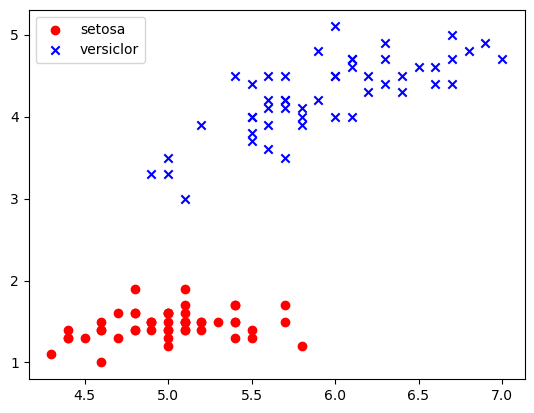

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('iris.data',header=None,encoding='utf-8')

y=df.iloc[0:100,4].values
y=np.where(y=='Iris-versicolor',1,-1)


X=df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label="setosa")
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label="versiclor")
plt.legend(loc='upper left')
plt.show()




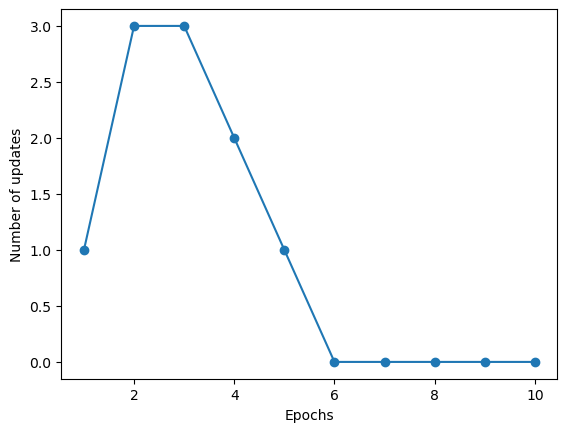

In [2]:
from Percetptron import Perceptron
ppn=Perceptron(eta=0.1,n_inter=10)
ppn.fit(X,y)

plt.plot(range(1,(len(ppn.errors_)+1)),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

/tmp/ipykernel_560350/110415739.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


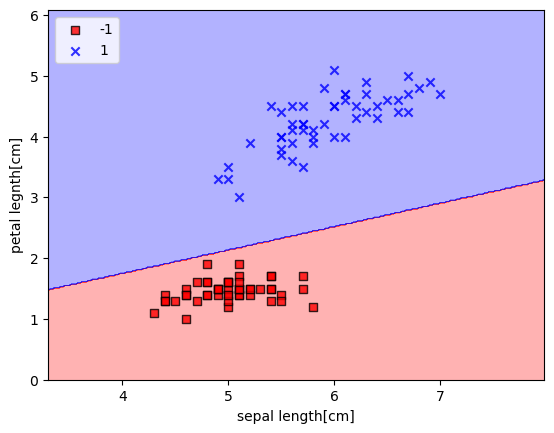

In [3]:
from matplotlib.colors import ListedColormap

# 決定境界
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    marker=markers[idx],
                    c=colors[idx],
                    label=cl,
                    edgecolors='black')
        
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length[cm]')
plt.ylabel('petal legnth[cm]')
plt.legend(loc='upper left')
plt.show()
        
